# Sampling Variability

**Goals**  
- Explain sampling variability and why repeated samples differ  
- Visualize sampling distributions with simulation  
- Connect standard error to sample size  
- Recognize law of large numbers behavior


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()


We will simulate many samples from a Bernoulli process (think weighted coin with $p=0.6$ for heads) to see how sample proportions vary.

Key quantities:
- True proportion $p$  
- Sample size $n$  
- Sample proportion $\hat p$  
- Sampling distribution: distribution of $\hat p$ across repeated samples


In [2]:
rng = np.random.default_rng(seed=0)

p_true = 0.6
n = 40
n_sims = 5_000

# Draw many samples and compute sample proportions
samples = rng.binomial(n=n, p=p_true, size=n_sims)
sample_props = samples / n

summary = pd.Series(sample_props).describe(percentiles=[0.025, 0.5, 0.975]).round(3)
summary


count    5000.000
mean        0.600
std         0.078
min         0.350
2.5%        0.450
50%         0.600
97.5%       0.750
max         0.850
dtype: float64

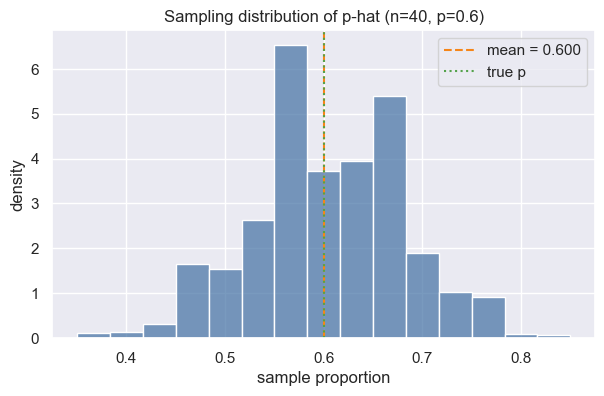

In [3]:
fig, ax = plt.subplots(figsize=(7, 4))
sns.histplot(sample_props, bins=15, stat="density", color="#4c78a8", edgecolor="white", ax=ax)

ax.axvline(sample_props.mean(), color="#f58518", linestyle="--", label=f"mean = {sample_props.mean():.3f}")
ax.axvline(p_true, color="#54a24b", linestyle=":", label="true p")
ax.set(xlabel="sample proportion", ylabel="density", title="Sampling distribution of p-hat (n=40, p=0.6)")
ax.legend()
plt.show()


For a sample proportion, the standard error measures the typical deviation of $\hat p$ from $p$:
$$\text{SE}(\hat p) = \sqrt{\dfrac{p(1-p)}{n}}$$
If $p$ is unknown, we often plug in $\hat p$.


In [4]:
se_theoretical = np.sqrt(p_true * (1 - p_true) / n)
se_empirical = sample_props.std(ddof=1)

print(f"Theoretical SE: {se_theoretical:.4f}")
print(f"Simulated SE:   {se_empirical:.4f}")


Theoretical SE: 0.0775
Simulated SE:   0.0781


Larger samples shrink variability. Below we compare sampling distributions across different $n$ while keeping $p=0.6$ fixed.


n  mean(p-hat)  sd(p-hat)  SE formula
0   10       0.5994     0.1549      0.1549
1   40       0.5984     0.0780      0.0775
2  200       0.5986     0.0348      0.0346

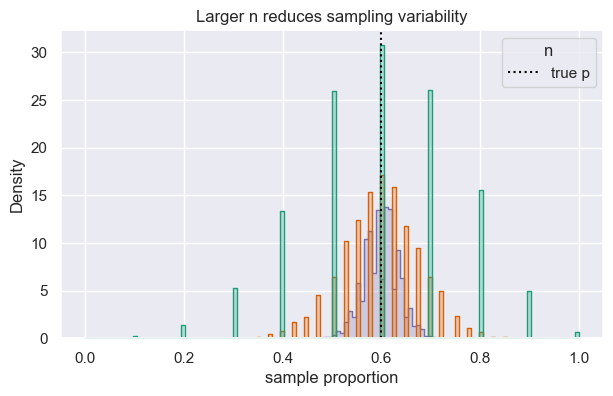

In [5]:
def simulate_props(n, p=0.6, sims=5_000):
    props = rng.binomial(n=n, p=p, size=sims) / n
    return props

ns = [10, 40, 200]
records = []
frames = []
for n_i in ns:
    props_i = simulate_props(n=n_i)
    frames.append(pd.DataFrame({"n": n_i, "prop": props_i}))
    records.append({
        "n": n_i,
        "mean(p-hat)": props_i.mean(),
        "sd(p-hat)": props_i.std(ddof=1),
        "SE formula": np.sqrt(p_true * (1 - p_true) / n_i)
    })

display(pd.DataFrame(records).round(4))

plot_df = pd.concat(frames, ignore_index=True)
fig, ax = plt.subplots(figsize=(7, 4))
sns.histplot(data=plot_df, x="prop", hue="n", element="step", stat="density", common_norm=False, palette="Dark2", ax=ax)
ax.axvline(p_true, color="black", linestyle=":", label="true p")
ax.set(xlabel="sample proportion", title="Larger n reduces sampling variability")
ax.legend(title="n")
plt.show()


**Takeaways**  
- Repeated samples vary; summarizing their distribution clarifies how much.  
- Standard error captures typical sampling fluctuation and shrinks as $n$ grows.  
- Simulations help check formulas and build intuition about variability.
